In [53]:
!pip install yfinance
!pip install plotly
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nbformat
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.9 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.3 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 2.4 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [54]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot as plt

In [5]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker( ticker_symbol )
df = ticker.history( period = "5y" ).reset_index( drop = False )
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004,0,0.0,0.0
1,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
2,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
3,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
4,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1254,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1255,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1256,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


In [6]:
df_clean = df.drop( columns = [ "Volume", "Dividends", "Stock Splits" ] )

df_clean

,Date,Open,High,Low,Close
0,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
1,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
2,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
3,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
4,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
...,...,...,...,...,...
1253,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1254,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1255,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1256,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003


# Ερώτημα 1

In [7]:
x_axis = df_clean[ "Date" ]

fig = go.Figure()

fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Open" ], mode = "lines+markers", name = "Open" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Close" ], mode = "lines+markers", name = "Close" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "High" ], mode = "lines+markers", name = "High" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Low" ], mode = "lines+markers", name = "Low" ) )

# Ερώτημα 2

Οι χρονοσειρές είναι προφανώς μη στατικές καθώς δεν ακολουθούν κάποιο μέσο όρο και αλλάζει συνεχώς η τυπική απόκλιση των δειγμάτων.

# Ερώτημα 3
Αν εκπαιδεύσουμε το μοντέλο στα συγκεκριμένα δεδομένα λογικά θα έχουμε αποκλίσεις. Βλέπουμε συγκεκριμένα το το 2021 ο μέσος όρος που επιδεικνύει το μοντέλο μας είναι σαφώς μικρότερος από το αντίστοιχο 2022 ή 2023.

# Ερώτημα 4
Μάλλον έχει να κάνει με τους δασμούς που είχαν σκοπό να εφαρμόσουν οι ΗΠΑ εκείνη την περίοδο.

# Ερώτημα 5
Είναι δυνατόν εφόσον έχει μοντελοποιηθεί ερπαρκώς η συνάρτηση μέσω της εκπαίδευσης. Πάλι όμως θα ήταν πολύ πιο χρήσιμο να μπορούσαμε να χρησιμοποιήσουμε τα δεδομένα και άλλα ημερών.

# Ερώτημα 6
Όχι δεν έχει νόημα καθώς θα θέλαμε να κρατήσουμε την χρονική σχέση των δεδομένων.

# Ερώτημα 7

In [8]:
mask_2024 = ( df_clean[ "Date" ] >= "2024-01-01" )
df_train = df_clean.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_clean.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

df_train.shape

(793, 4)

# Ερώτημα 8

In [9]:
def getDataFromWindow( data_x, data_y, window_size ):
	np_x = data_x.to_numpy()
	cols = data_x.shape[1]
	x = np.zeros( ( len( data_x ) - window_size, window_size*cols ) )
	for i in range( len( data_x ) - window_size ):
		for j in range( window_size ):
			for k in range( cols ):
				x[i, j*cols + k ] = np_x[i + j, k ]
	
	return x, data_y[ window_size: ].to_numpy()

x_temp, y_temp = getDataFromWindow( x_train, y_train, 3 )


# Ερώτημα 9
Εξαρτάται, αν θέλουμε προβλέψεις σε βάθος ημέρας τότε μας βολεύει ένα μικρό παράθυρο. Αντίθετα αν θέλουμε αποτελέσματα για βάθη χρόνου τότε θέλουμε μεγάλα παράθυρα.

# Ερώτημα 10
Η συνάρτηση έχει ήδη υλοποιηθεί οπότε απλά δημιουργούμε τα δεδομένα μας και επαληθεύουμε την ορθότητα τους

In [34]:
window = 5
x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

print( "Dimensions of x_train_data: ", x_train_data.shape )
print( "Dimensions of y_train_data: ", y_train_data.shape )
print( "First row of x_train_data: \n", x_train_data[ 0, : ] )
print( df_clean[:5] )
print( "First value of y_train_data: ", y_train_data[ 0 ] )

Dimensions of x_train_data:  (788, 20)
Dimensions of y_train_data:  (788,)
First row of x_train_data: 
 [93.08999634 94.30000305 93.08999634 93.41000366 93.33999634 93.55000305
 92.48999786 92.52999878 92.56999969 92.81999969 92.18000031 92.23000336
 92.23999786 92.95999908 92.12999725 92.73000336 92.76000214 92.97000122
 92.59999847 92.75      ]
                       Date       Open       High        Low      Close
0 2020-11-04 00:00:00-05:00  93.089996  94.300003  93.089996  93.410004
1 2020-11-05 00:00:00-05:00  93.339996  93.550003  92.489998  92.529999
2 2020-11-06 00:00:00-05:00  92.570000  92.820000  92.180000  92.230003
3 2020-11-09 00:00:00-05:00  92.239998  92.959999  92.129997  92.730003
4 2020-11-10 00:00:00-05:00  92.760002  92.970001  92.599998  92.750000
First value of y_train_data:  93.04000091552734


# Ερώτημα 11

In [44]:
from sklearn.metrics import mean_absolute_error


class TrainingResults:
    def __init__(self):
        self.training_data_accuracy = 0.
        self.test_data_accuracy = 0.

def modelTrain( model, x_train = x_train_data, y_train = y_train_data, x_test = x_test_data, y_test = y_test_data ):
    ret = TrainingResults()
    model.fit( x_train, y_train )
    ret.training_data_accuracy = mean_absolute_error( y_train, model.predict( x_train ) )
    ret.test_data_accuracy = mean_absolute_error( y_test, model.predict( x_test ) )

    return ret
    


Linear Regression Training Data Accuracy: 0.35
Linear Regression Test Data Accuracy: 0.34
Random Forest Training Data Accuracy: 0.15
Random Forest Test Data Accuracy: 0.39
Bagging with linear regressor Training Data Accuracy: 0.35
Bagging with linear regressor Test Data Accuracy: 0.34
Stacking Training Data Accuracy: 0.36
Stacking Test Data Accuracy: 0.34


<BarContainer object of 4 artists>

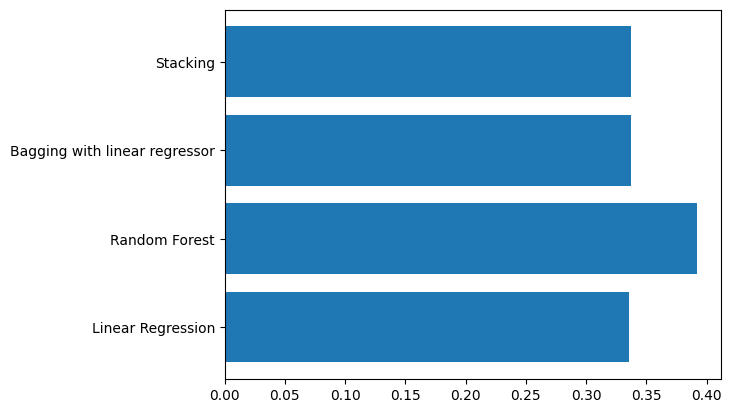

In [ ]:
def printAccuracies( model_name, results ):
    print( f"{model_name} Training Data Accuracy: {results.training_data_accuracy:.2f}" )
    print( f"{model_name} Test Data Accuracy: {results.test_data_accuracy:.2f}" )

accuracies = []
linear_model = LinearRegression( n_jobs = -1 )
linear_results = modelTrain( linear_model )
accuracies.append( ( "Linear Regression", linear_results ) )
printAccuracies( accuracies[-1][0], linear_results )

random_forest_model = RandomForestRegressor( n_jobs = -1 )
random_forest_results = modelTrain( random_forest_model )
accuracies.append( ( "Random Forest", random_forest_results ) )
printAccuracies( accuracies[-1][0], random_forest_results )

bagging_linear_model = BaggingRegressor( estimator = LinearRegression(), n_jobs = -1 )
bagging_linear_results = modelTrain( bagging_linear_model )
accuracies.append( ( "Bagging with linear regressor", bagging_linear_results ) )
printAccuracies( accuracies[-1][0], bagging_linear_results )

stacking_model = StackingRegressor( estimators = [("lr", LinearRegression()), ("rf", RandomForestRegressor())], n_jobs = -1 )
stacking_results = modelTrain( stacking_model )
accuracies.append( ( "Stacking", stacking_results ) )
printAccuracies( accuracies[-1][0], stacking_results )

plt.barh( [ acc[0] for acc in accuracies ], [ acc[1].train_data_accuracy for acc in accuracies ] )
plt.barh( [ acc[0] for acc in accuracies ], [ acc[1].test_data_accuracy for acc in accuracies ] )